# Analytical $S_{tot}(T)$ for phase transformations
### Neshyba, 2021


## Learning Goals
1. Describe how the second law works analytically in the context of phase transformations
1. Develop skill in implementing these analytical results in Python

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
import sympy as sp
%matplotlib notebook

### 1. Second Law analysis of boiling water

118.85000000000001
40660


(-160, 130)

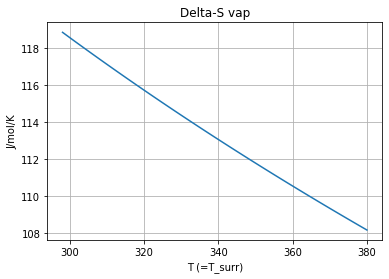

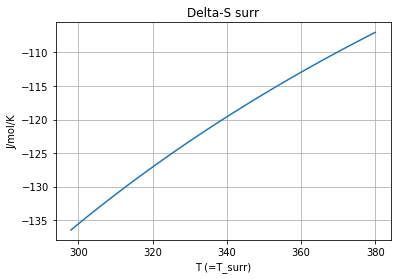

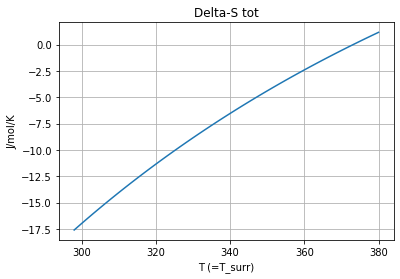

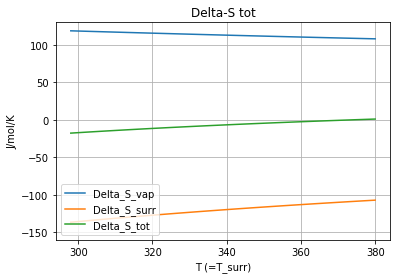

In [2]:
# Lay out an array of temperatures from standard state (298) to above where we think boiling will occur
T0 = 298
T = T_surr = np.linspace(T0,380)

# Some standard-state values
SS_liq = 69.95
SS_gas = 188.8

# Calculating standard-state entropy and enthalpy of vaporization
Delta_S0_vap = SS_gas-SS_liq; print(Delta_S0_vap)
Delta_H0_vap = 40660; print(Delta_H0_vap)

# Calculating 
Delta_CP = -44

# The system's entropy of vaporization as a function of temperature
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)
plt.figure()
plt.plot(T,Delta_S_vap)
plt.grid(True)
plt.title('Delta-S vap')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')

# The surroundings' entropy change as a function of temperature
Delta_S_surr = -Delta_H0_vap/T_surr
plt.figure()
plt.plot(T,Delta_S_surr)
plt.grid(True)
plt.title('Delta-S surr')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')

# The total entropy change as a function of temperature
Delta_S_tot = Delta_S_vap + Delta_S_surr
plt.figure()
plt.plot(T,Delta_S_tot)
plt.grid(True)
plt.title('Delta-S tot')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')

plt.figure()
plt.plot(T,Delta_S_vap,label='Delta_S_vap')
plt.plot(T,Delta_S_surr,label='Delta_S_surr')
plt.plot(T,Delta_S_tot,label='Delta_S_tot')
plt.grid(True)
plt.title('Delta-S tot')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
plt.legend(loc='lower left')
plt.ylim([-160,130])

### Pause for analysis
1. For the system and surroundings (each), comment on why the sign makes sense to you.
1. For $S_{tot}$, does it reach a value of zero at the expected temperature?

1. For an endothermic process, like vaporization, we expect that the enthalpy change of the system should be positive, and that of the surroundings be negative (which is what is shown).

1. $S_{tot}$ reaches a value of zero at 373 K -- the boiling temperature of water.

### 2. Second  Law analysis of boiling ethanol
Some standard-state values for ethanol that will be handy here:

$S_o(liq) = 160 \ J/(mol \ K)$  
$S_o(gas) = 275 \ J/(mol \ K)$  
$C_P(liq) = 112 \ J/(mol \ K)$  
$C_P(gas) = 70 \ J/(mol \ K)$  
$\Delta H_{vap}^o = 38 \ kJ/mol$


Standard entropy of vaporization= 115


Text(0, 0.5, 'J/mol/K')

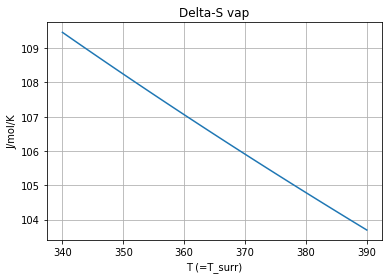

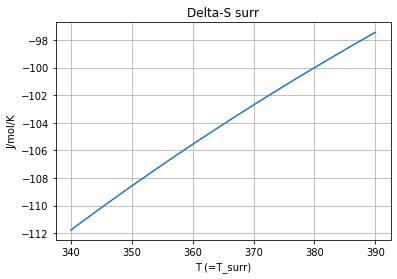

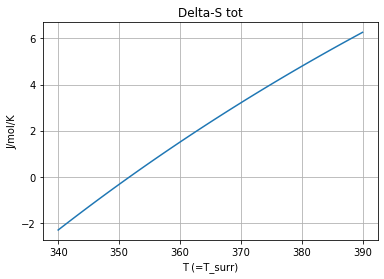

In [3]:
### BEGIN SOLUTION
T = T_surr = np.linspace(340,390)
T0 = 298
SS_liq = 160
SS_gas = 275
Delta_S0_vap = SS_gas-SS_liq; print('Standard entropy of vaporization=', Delta_S0_vap)
CP_liq = 112
CP_gas = 70
Delta_CP = CP_gas-CP_liq
Delta_H_vap = 38000 

# Working on the system's entropy of vaporization
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)
plt.figure()
plt.plot(T,Delta_S_vap)
plt.grid(True)
plt.title('Delta-S vap')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([-115,-105])

# Working on the surroundings' entropy change
Delta_S_surr = -Delta_H_vap/T_surr
plt.figure()
plt.plot(T,Delta_S_surr)
plt.grid(True)
plt.title('Delta-S surr')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([105,115])

# Working on the total entropy change
Delta_S_tot = Delta_S_vap + Delta_S_surr
plt.figure()
plt.plot(T,Delta_S_tot)
plt.grid(True)
plt.title('Delta-S tot')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([-5,5])
### END SOLUTION

### Pause for analysis
For $S_{tot}$, does it reach a value of zero close at a reasonable temperature, given that the ethanol-water azeotrope boils at around $350 \ K$?

$S_{tot}$ reaches a value of zero at 351 K -- the boiling temperature of ethanol.

### 2nd Law analysis of freezing water
Some useful standard-state values:  
$S_o(liq) = 69.95 \ J/(mol \ K)$  
$S_o(sol) = 44.62 \ J/(mol \ K)$  
$C_P(liq) = 75.4 \ J/(mol \ K)$  
$C_P(sol) = 38 \ J/(mol \ K)$  
$\Delta H_{fus}^o = 6.0 \ kJ/mol$

Delta_S0_fus_298 25.330000000000005
Delta_H_fus 6020


Text(0, 0.5, 'J/mol/K')

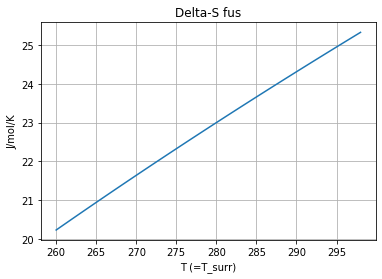

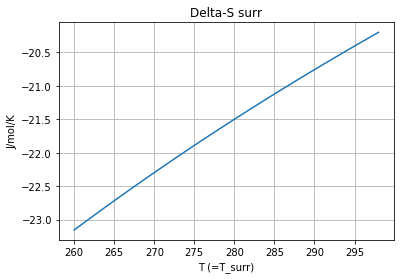

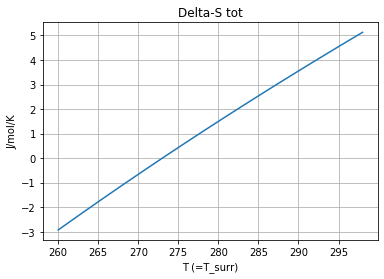

In [4]:
### BEGIN SOLUTION
# Parameters
T = T_surr = np.linspace(260,298)
T0 = 298
SS_liq = 69.95
SS_sol = 44.62
CP_liq = 75.4
CP_sol = 38

# Get the standard-state entropy and enthalpy of fusion
Delta_S0_fus = SS_liq-SS_sol; print('Delta_S0_fus_298',Delta_S0_fus)
Delta_H_fus = 6020;  print('Delta_H_fus',Delta_H_fus)

# We'll need the difference in heat capacities
Delta_CP = CP_liq-CP_sol

# Working on the system's entropy of fusion
Delta_S_fus = Delta_S0_fus + Delta_CP*np.log(T/T0); #print('Delta_S_fus',Delta_S_fus)
plt.figure()
plt.plot(T,Delta_S_fus)
plt.grid(True)
plt.title('Delta-S fus')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([20,25])

# Working on the surroundings' entropy change
Delta_S_surr = -Delta_H_fus/T_surr; #print('Delta_S_surr',Delta_S_surr)
plt.figure()
plt.plot(T,Delta_S_surr)
plt.grid(True)
plt.title('Delta-S surr')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([-25,-20])

# Working on the surroundings' entropy change
Delta_S_tot = Delta_S_fus + Delta_S_surr
plt.figure()
plt.plot(T,Delta_S_tot)
plt.grid(True)
plt.title('Delta-S tot')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
# plt.ylim([-2.5,2.5])
### END SOLUTION

### Pause for analysis
1. Once again, for the system and surroundings (each), comment on why the sign makes sense to you.
1. For $S_{tot}$, does it reach a value of zero close to the expected temperature?

1. For an endothermic process, like melting, we expect that the enthalpy change of the system should be positive, and that of the surroundings be negative (which is what is shown).

1. $S_{tot}$ reaches a value of zero at 273 K -- the melting temperature of water ice.